<a href="https://www.kaggle.com/code/eugenetanake/basic-web-scraping-with-python-pt-2?scriptVersionId=97367724" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Hi all, welcome back! In this second part of basic web scraping with python using Beautiful Soup, I will be looking through each course to find information to extract.

In [1]:
# importing the libraries
import requests # to allow http requests
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from bs4 import BeautifulSoup
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'): # command to search for file from input
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/basic-web-scraping-with-python-pt-1/__results__.html
/kaggle/input/basic-web-scraping-with-python-pt-1/__resultx__.html
/kaggle/input/basic-web-scraping-with-python-pt-1/webScrap1.csv
/kaggle/input/basic-web-scraping-with-python-pt-1/__notebook__.ipynb
/kaggle/input/basic-web-scraping-with-python-pt-1/__output__.json
/kaggle/input/basic-web-scraping-with-python-pt-1/custom.css


In [3]:
df = pd.read_csv('/kaggle/input/basic-web-scraping-with-python-pt-1/webScrap1.csv')

Now that we are done with the list of courses, let us go into individual courses to see what other details can we obtain.

It seems like we are able to obtain the course difficulty, the number of likes and its rating.

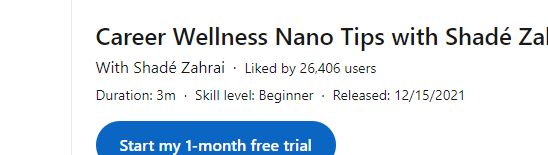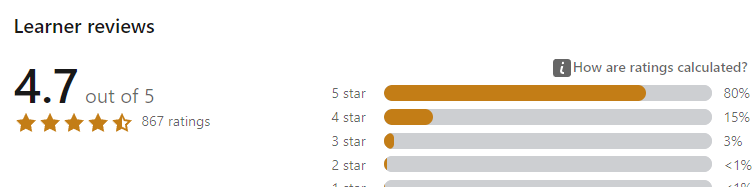

It looks like all the details we want is in a \<span> element

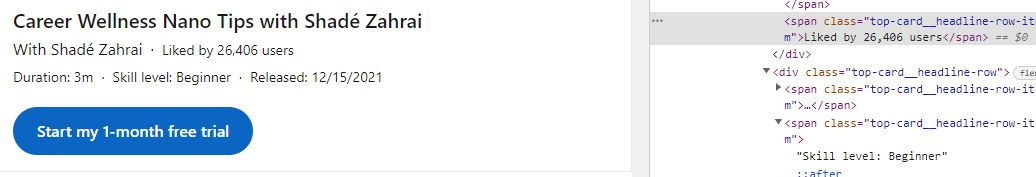

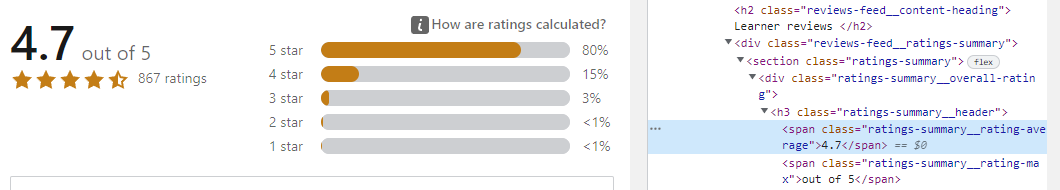

In [4]:
topCardList = []

for i in df['url']:
    req = requests.get(i).text
    soup = BeautifulSoup(req)
    temp = soup.find_all('span',{'class':'top-card__headline-row-item'})
    topCardList.append(temp)
topCardList

[[<span class="top-card__headline-row-item top-card__headline-row-item--large">With Nick Brazzi</span>,
  <span class="top-card__headline-row-item">Liked by 2 users</span>,
  <span class="top-card__headline-row-item">Duration: 2h 53m</span>,
  <span class="top-card__headline-row-item">Skill level: Beginner + Intermediate</span>,
  <span class="top-card__headline-row-item">Released: 6/1/2022</span>],
 [<span class="top-card__headline-row-item top-card__headline-row-item--large">With Garrick Chow</span>,
  <span class="top-card__headline-row-item">Liked by 1 user</span>,
  <span class="top-card__headline-row-item">Duration: 27m</span>,
  <span class="top-card__headline-row-item">Skill level: General</span>,
  <span class="top-card__headline-row-item">Released: 6/1/2022</span>],
 [<span class="top-card__headline-row-item top-card__headline-row-item--large">With Ayaka Shinozaki</span>,
  <span class="top-card__headline-row-item">Liked by 1 user</span>,
  <span class="top-card__headline-row

In [5]:
lengthList = []
for i in topCardList:
    lengthList.append(len(i))
set(lengthList)

{4, 5}

Oh? It seems like there are missing values. That is to be expected. Since the first few rows are released than less than 5 days or so from the date of creation of this notebook. Let us check if it is the same with ratings.

In [6]:
ratings = []

for i in df['url']:
    req = requests.get(i).text
    soup = BeautifulSoup(req)
    temp = soup.find('span',{'class':'ratings-summary__rating-average'})
    ratings.append(temp)
ratings

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 <span class="ratings-summary__rating-average">4.7</span>,
 <span class="ratings-summary__rating-average">4.5</span>,
 <span class="ratings-summary__rating-average">4.7</span>,
 <span class="ratings-summary__rating-average">4.8</span>,
 <span class="ratings-summary__rating-average">4.8</span>,
 <span class="ratings-summary__rating-average">4.7</span>,
 <span class="ratings-summary__rating-average">4.8</span>,
 <span class="ratings-summary__rating-average">4.7</span>,
 <span class="ratings-summary__rating-average">4.8</span>,
 <span class="ratings-summary__rating-average">4.7</span>,
 <span class="ratings-summary__rating-average">4.8</span>,
 <span class="ratings-summary__rating-average">4.8</span>,
 <span class="ratings-summary__rating-average">4.7</span>,
 <span class="ratings-summary__rating-average">4.5</span>,
 <span class="ratings-summary__rating-average">4.7</spa

As expected. There are no ratings for new courses. Let us just enter a None for those without ratings.

In [7]:
likesList = []
skillLevelList = []
ratingList = []
ratingMaxList = []

for i in df['url']:
    req = requests.get(i).text
    soup = BeautifulSoup(req)
    temp = soup.find_all('span',{'class':'top-card__headline-row-item'})
    likes = None
    skill = None
    for i in temp:
        if "Liked" in i.text:
            likes = i.text
        if "Skill" in i.text:
            skill = i.text
    likesList.append(likes)
    skillLevelList.append(skill)
    rating = soup.find('span',{'class':'ratings-summary__rating-average'})
    if rating is not None:
        ratingList.append(rating.text)
    else:
        ratingList.append(None)
    ratingMax = soup.find('span',{'class':'ratings-summary__rating-max'})
    if rating is not None:
        ratingMaxList.append(ratingMax.text)
    else:
        ratingMaxList.append(None)

In [8]:
print(len(likesList))
print(len(skillLevelList))
print(len(ratingList))
print(len(ratingMaxList))

50
50
50
50


In [9]:
tempdf = pd.DataFrame(list(zip(likesList,skillLevelList,ratingList,ratingMaxList)),
                     columns = ['likes','skill level','rating','rating max'])
df = pd.concat([df,tempdf],axis = 1)
df

,course name,url,duration,by,viewer count,release date,likes,skill level,rating,rating max
0,Microsoft Teams Essential Training,https://www.linkedin.com/learning/microsoft-te...,2h 53m,By: Nick Brazzi,0,"Released Jun 1, 2022",Liked by 2 users,Skill level: Beginner + Intermediate,None,None
1,Outlook Quick Tips,https://www.linkedin.com/learning/outlook-quic...,27m,By: Garrick Chow,0,"Released Jun 1, 2022",Liked by 1 user,Skill level: General,None,None
2,Introduction to RedisGraph,https://www.linkedin.com/learning/introduction...,1h 13m,By: Ayaka Shinozaki,0,"Released Jun 1, 2022",Liked by 1 user,Skill level: Beginner,None,None
3,Azure Dapr for .NET Developers Part 1,https://www.linkedin.com/learning/azure-dapr-f...,1h 47m,By: Rodrigo Díaz Concha,0,"Released Jun 1, 2022",None,Skill level: Intermediate,None,None
4,Blockchain Programming in JavaScript,https://www.linkedin.com/learning/blockchain-p...,1h 55m,By: Mohammad Azam,0,"Released Jun 1, 2022",None,Skill level: Intermediate,None,None
5,Learning Azure Kubernetes Service (AKS),https://www.linkedin.com/learning/learning-azu...,1h 18m,By: Richard Hooper,0,"Released Jun 2, 2022",Liked by 4 users,Skill level: Intermediate,None,None
6,Mapping to Learn with Figma,https://www.linkedin.com/learning/mapping-to-l...,31m,By: Drew Bridewell,0,"Released Jun 2, 2022",None,Skill level: Intermediate,None,None
7,Git Workflows,https://www.linkedin.com/learning/git-workflow...,1h 4m,By: Kevin Bowersox,0,"Released Jun 2, 2022",None,Skill level: Intermediate,None,None
8,CRISC Cert Prep Audio Review,https://www.linkedin.com/learning/crisc-cert-p...,51m,By: Jerod Brennen,0,"Released May 31, 2022",None,Skill level: Intermediate,None,None
9,Designing for Developers,https://www.linkedin.com/learning/designing-fo...,10m,By: Joseph Labrecque,0,"Released May 31, 2022",Liked by 1 user,Skill level: Intermediate,None,None


In [10]:
os.chdir(r'/kaggle/working')

df.to_csv(r'webScrap2.csv', index = False)

This is the end of Part 2. If you are interested in the finished and tidied codes please go to the following link:

https://www.kaggle.com/eugenetanake/basic-web-scraping-with-python-express

Thanks for viewing!